# Parte 1 : Regresión lineal con una variable

## 1.1 Carga de datos

En la práctica uno se va a trabajar la regresion lineal con una variable a partir de los datos almacenados en un archivo csv que se nos proporciona. Los datos extraidos estan separado en dos columnas y representan los beneficios de una compañia de distribución de comida en distintas ciudades en base a su población.

In [12]:
from pandas.io.parsers import read_csv
import numpy as np

Definimos un método que lee y carga los datos de un csv y retorna esta información recopilada. Se dicta que en el archivo no hay información de cabecera (header = None) y que los valores que son devueltos son de tipo flotantes.

In [13]:
def load_csv(filename):
    values = read_csv(filename, header=None).values
    return values.astype(float)

In [14]:
dataset = load_csv('./datasets/ex1data1.csv')

Utilizamos el conjunto de datos obtenido del csv con la función especificada previamente y separamos cada columna en vectores diferentes para poder gestionarlos de manera independiente, de este modo de puede usar cada columna para su estudio.

In [15]:
independent_data = dataset[:,0]
dependent_data = dataset[:,1]

## 1.2 Visualización simple de dataset 

A continuación se generará un plotter con los datos que previamente tratados. Se creará un plotter de cruces enfrentando los valores de beneficios de la empresa estudiada y la población que se nos ha proporvionado en el dataset.

In [16]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(independent_data, dependent_data, 'rx')
plt.ylabel('Ingresos en $10.000s')
plt.xlabel('Poblacion de la ciudad en 10.000s')

Text(0.5,0,'Poblacion de la ciudad en 10.000s')

## 1.3 Método de descenso gradiente

Para encontrar la regresión lineal que más se adapte a nuestro dataset, es necesario realizar operaciones básicas de modo que en cada una de las iteraciones se obtenga un resultado más cercano al óptimo. Se necesita definir la función de coste y la función de gradiente de descenso que nos permitira obtener este resultado.

Siempre se tiene que tener en cuenta la función que se usará como hipótesis, en nuestro caso se trata de una unica variable y de una recta.

### - Implementación de la función de hipótesis de la regresión lineal 

In [17]:
def hyphotesis_function(th0, th1, x):
    return th0 + th1*x

### - Implementacion de la funcion de coste de la regresion lineal J(th0,th1)

In [18]:
def cost_function(fun, th0, th1, m, x, y):
    sum_cost = 0
    for i in range(0, m):
        sum_cost += (fun(th0, th1, x[i]) - y[i])**2
    cost = sum_cost / (2*m)
    return cost

### - Implementación de función Gradiente descendente

In [63]:
def gradient_descent(fun, th0, th1, m, x, y, lr=0.01, epochs=1500):
    cost = []
    vc_th0 = []
    vc_th1 = []
    curr_th0 = th0
    curr_th1 = th1
    for i in range(0, epochs):
        new_th0 = curr_th0 - (lr/m)*np.sum([fun(curr_th0, curr_th1, x[j]) - y[j] for j in range(0, m)])
        new_th1 = curr_th1 - (lr/m)*np.sum([((fun(curr_th0, curr_th1, x[j]) - y[j])*x[j]) for j in range(0, m)])
        curr_th0 = new_th0
        curr_th1 = new_th1
        epoch_cost = cost_function(fun, curr_th0, curr_th1, m, x, y)
        cost += [epoch_cost]
        vc_th0 += [curr_th0]
        vc_th1 += [curr_th1]
        print('It: {}, Cost: {}'.format(i, epoch_cost))
    return curr_th0, curr_th1, cost, vc_th0, vc_th1 

A continución se muestran las variables que se han usado para la gestión de la práctica, de este modo se pueden cambiar paramentros de las pruebas de forma comoda. 

In [58]:
th0 = 0
th1 = 0
lr = 0.01
m = len(dataset)

## 1.4 Resultados obtenidos del estudio

Se aplican las funciones definidas previamente y se muestran los resultados para poder tomar unas conclusiones concretas. Se ejecuta la función de gradiente de descenso en nuestra función de hipótesis, además de toda la información necesaria gestionada y obtenida de nuestro conjunto de datos.

In [64]:
gd_th0, gd_th1, gd_cost, vc_gd_th0, vc_gd_th1 = gradient_descent(hyphotesis_function, th0, th1, m, independent_data, dependent_data, lr)
print ('th0:{}, th1:{}, cost:{}'.format(gd_th0, gd_th1, gd_cost[-1]))

It: 0, Cost: 6.737190464870011
It: 1, Cost: 5.931593568604957
It: 2, Cost: 5.901154707081387
It: 3, Cost: 5.895228586444221
It: 4, Cost: 5.890094943117332
It: 5, Cost: 5.885004158443646
It: 6, Cost: 5.879932480491416
It: 7, Cost: 5.874879094762575
It: 8, Cost: 5.8698439118063845
It: 9, Cost: 5.8648268653129305
It: 10, Cost: 5.8598278899321805
It: 11, Cost: 5.85484692057229
It: 12, Cost: 5.849883892376585
It: 13, Cost: 5.844938740722034
It: 14, Cost: 5.840011401218366
It: 15, Cost: 5.835101809707228
It: 16, Cost: 5.83020990226139
It: 17, Cost: 5.8253356151838664
It: 18, Cost: 5.820478885007099
It: 19, Cost: 5.8156396484921515
It: 20, Cost: 5.81081784262787
It: 21, Cost: 5.806013404630042
It: 22, Cost: 5.801226271940627
It: 23, Cost: 5.796456382226899
It: 24, Cost: 5.791703673380653
It: 25, Cost: 5.786968083517396
It: 26, Cost: 5.782249550975539
It: 27, Cost: 5.777548014315598
It: 28, Cost: 5.772863412319381
It: 29, Cost: 5.768195683989212
It: 30, Cost: 5.76354476854712
It: 31, Cost: 5.7

It: 359, Cost: 4.869480312344591
It: 360, Cost: 4.868066517807121
It: 361, Cost: 4.866657815675988
It: 362, Cost: 4.865254187608632
It: 363, Cost: 4.863855615328573
It: 364, Cost: 4.862462080625158
It: 365, Cost: 4.861073565353324
It: 366, Cost: 4.859690051433372
It: 367, Cost: 4.858311520850716
It: 368, Cost: 4.856937955655666
It: 369, Cost: 4.85556933796318
It: 370, Cost: 4.854205649952639
It: 371, Cost: 4.852846873867618
It: 372, Cost: 4.851492992015638
It: 373, Cost: 4.85014398676796
It: 374, Cost: 4.8487998405593355
It: 375, Cost: 4.8474605358877865
It: 376, Cost: 4.84612605531437
It: 377, Cost: 4.84479638146297
It: 378, Cost: 4.843471497020046
It: 379, Cost: 4.842151384734427
It: 380, Cost: 4.8408360274170805
It: 381, Cost: 4.839525407940882
It: 382, Cost: 4.838219509240405
It: 383, Cost: 4.8369183143116805
It: 384, Cost: 4.835621806212001
It: 385, Cost: 4.834329968059678
It: 386, Cost: 4.833042783033826
It: 387, Cost: 4.831760234374152
It: 388, Cost: 4.830482305380745
It: 389, C

It: 794, Cost: 4.558657632698343
It: 795, Cost: 4.558363403515664
It: 796, Cost: 4.558070234129522
It: 797, Cost: 4.557778120722592
It: 798, Cost: 4.557487059491294
It: 799, Cost: 4.557197046645756
It: 800, Cost: 4.556908078409752
It: 801, Cost: 4.556620151020653
It: 802, Cost: 4.5563332607294
It: 803, Cost: 4.556047403800418
It: 804, Cost: 4.555762576511593
It: 805, Cost: 4.555478775154231
It: 806, Cost: 4.555195996032978
It: 807, Cost: 4.554914235465802
It: 808, Cost: 4.554633489783927
It: 809, Cost: 4.554353755331796
It: 810, Cost: 4.554075028467023
It: 811, Cost: 4.553797305560327
It: 812, Cost: 4.553520582995514
It: 813, Cost: 4.553244857169414
It: 814, Cost: 4.5529701244918215
It: 815, Cost: 4.552696381385485
It: 816, Cost: 4.552423624286017
It: 817, Cost: 4.5521518496418825
It: 818, Cost: 4.551881053914332
It: 819, Cost: 4.551611233577363
It: 820, Cost: 4.55134238511768
It: 821, Cost: 4.551074505034633
It: 822, Cost: 4.55080758984018
It: 823, Cost: 4.5505416360588615
It: 824, Co

It: 1079, Cost: 4.506180437098755
It: 1080, Cost: 4.506075227746221
It: 1081, Cost: 4.505970397351696
It: 1082, Cost: 4.505865944550207
It: 1083, Cost: 4.505761867981676
It: 1084, Cost: 4.5056581662909405
It: 1085, Cost: 4.505554838127716
It: 1086, Cost: 4.505451882146566
It: 1087, Cost: 4.50534929700692
It: 1088, Cost: 4.505247081373026
It: 1089, Cost: 4.505145233913951
It: 1090, Cost: 4.505043753303542
It: 1091, Cost: 4.504942638220435
It: 1092, Cost: 4.504841887348025
It: 1093, Cost: 4.5047414993744415
It: 1094, Cost: 4.504641472992545
It: 1095, Cost: 4.504541806899905
It: 1096, Cost: 4.5044424997987775
It: 1097, Cost: 4.5043435503961
It: 1098, Cost: 4.504244957403458
It: 1099, Cost: 4.504146719537085
It: 1100, Cost: 4.504048835517842
It: 1101, Cost: 4.503951304071185
It: 1102, Cost: 4.5038541239271686
It: 1103, Cost: 4.5037572938204224
It: 1104, Cost: 4.503660812490136
It: 1105, Cost: 4.503564678680032
It: 1106, Cost: 4.503468891138365
It: 1107, Cost: 4.503373448617894
It: 1108, Co

It: 1359, Cost: 4.487605992608355
It: 1360, Cost: 4.487567687332955
It: 1361, Cost: 4.487529520030948
It: 1362, Cost: 4.4874914902053575
It: 1363, Cost: 4.487453597361011
It: 1364, Cost: 4.487415841004498
It: 1365, Cost: 4.4873782206442
It: 1366, Cost: 4.487340735790272
It: 1367, Cost: 4.487303385954625
It: 1368, Cost: 4.48726617065093
It: 1369, Cost: 4.487229089394612
It: 1370, Cost: 4.487192141702836
It: 1371, Cost: 4.487155327094521
It: 1372, Cost: 4.487118645090291
It: 1373, Cost: 4.4870820952125285
It: 1374, Cost: 4.487045676985318
It: 1375, Cost: 4.487009389934455
It: 1376, Cost: 4.486973233587461
It: 1377, Cost: 4.486937207473537
It: 1378, Cost: 4.486901311123599
It: 1379, Cost: 4.486865544070243
It: 1380, Cost: 4.486829905847749
It: 1381, Cost: 4.486794395992076
It: 1382, Cost: 4.486759014040854
It: 1383, Cost: 4.486723759533374
It: 1384, Cost: 4.486688632010598
It: 1385, Cost: 4.486653631015132
It: 1386, Cost: 4.486618756091232
It: 1387, Cost: 4.486584006784799
It: 1388, Cost:

Como se estudia en los datos mostrados previamente y en la gráfica que se genera posteriormente, se observa que nuestro valor de coste va disminuyendo según se aplica el descenso de gradiente.

Text(0.5,0,'num_epoch')

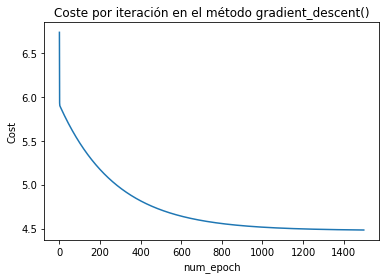

In [61]:
plt.plot(gd_cost)
plt.title('Coste por iteración en el método gradient_descent()')
plt.ylabel('Cost')
plt.xlabel('num_epoch')

Finalmente se muestra el resultado de manera coherente enfrentando los valores del dataset original y los datos obtenidos de ejecutar nuestra función gradiente sobre esos datos.

### Visualización en plotter normal

Text(0.5,0,'Poblacion de la ciudad en 10.000s')

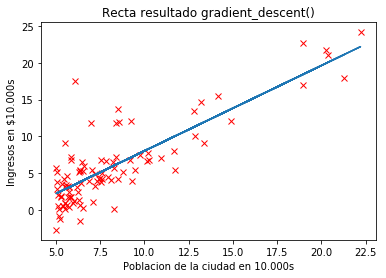

In [55]:
plt.plot(independent_data, dependent_data, 'rx', independent_data, hyphotesis_function(gd_th0, gd_th1, independent_data))
plt.title('Recta resultado gradient_descent()')
plt.ylabel('Ingresos en $10.000s')
plt.xlabel('Poblacion de la ciudad en 10.000s')

El resultado es una recta que se encuentra ajustada lo máximo posible para nuestro conjunto de datos, esta recta tiene la separación mínima entre los puntos y la resta, obtenido gracias a la función descenso de gradiente.

### Visualización en plotters 3D

In [24]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

Text(0.5,0,'Th1')

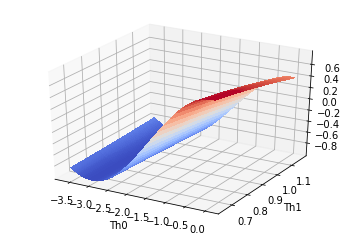

In [129]:
fig = plt.figure()
ax = fig.gca(projection='3d')

X, Y = np.meshgrid(vc_gd_th0, vc_gd_th1)
R = np.sqrt(X**2 + Y**2)
Z = np.cos(R)

ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False)
plt.xlabel('Th0')
plt.ylabel('Th1')

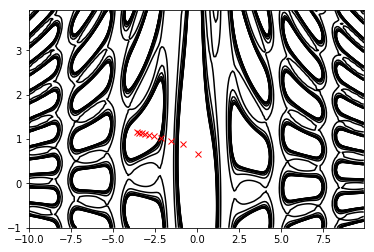

In [127]:
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

X = np.arange(-10, 10, 0.1)
Y = np.arange(-1, 4, 0.1)

X, Y = np.meshgrid(X, Y)
Z = f(X,Y)

plt.contour(X, Y, Z ,np.logspace(-2, 3, 20), colors='black')
plt.plot(vc_gd_th0[::150], vc_gd_th1[::150], 'rx')

# Parte 2 : Regresión lineal con dos variables



In [6]:
dataset = load_csv('./datasets/ex1data2.csv')
nfeatures = 2
dataset[:5]

array([[2.104e+03, 3.000e+00, 3.999e+05],
       [1.600e+03, 3.000e+00, 3.299e+05],
       [2.400e+03, 3.000e+00, 3.690e+05],
       [1.416e+03, 2.000e+00, 2.320e+05],
       [3.000e+03, 4.000e+00, 5.399e+05]])

In [7]:
features = dataset[:,:nfeatures]
target = dataset[:,nfeatures]
features.shape

(47, 2)

In [8]:
def normalice(x):
    mu = [np.mean(x[:,i]) for i in range(0,len(x[0]))]
    sigma = [np.std(x[:,i]) for i in range(0,len(x[0]))]
    xnorm = abs(x - mu)/sigma
    return xnorm, mu, sigma

In [9]:
features_norm, mu, sigma = normalice(features)
ones = np.ones([len(features),len(features[0])+1])
ones[:,1:] = features_norm
features_norm = ones
features_norm[:3]

array([[1.        , 0.13141542, 0.22609337],
       [1.        , 0.5096407 , 0.22609337],
       [1.        , 0.5079087 , 0.22609337]])

In [31]:
#th = np.zeros([len(features_norm[0]),1])
th = np.array([0,0,0])
lr = 0.01
m = len(dataset)
th

array([0, 0, 0])

In [32]:
hyphotesis_function = lambda th,x : np.dot(np.transpose(th), x)

In [33]:
hyphotesis_function(th, features_norm[0,:])

0.0

In [13]:
def cost_function(fun, th, m, x, y):
    sum_cost = 0
    for i in range(0, m):
        sum_cost += (fun(th, x[i,:]) - y[i])**2
    cost = sum_cost / (2*m)
    return cost

In [34]:
cost_function(hyphotesis_function, th, m, features_norm, target)

65591548106.45744

In [37]:
def gradient_descent(fun, th, m, x, y, lr=0.01, epochs=1500):
    cost = []
    curr_th = th
    for e in range(0, epochs):
        #print(np.shape(curr_th), type(curr_th))
        #asd = np.multiply((lr/m),[np.sum([np.dot((fun(th, x[j,:]) - y[j]),x[j,i]) for j in range(0, m)]) for i in range(0, len(x[0]))])
        #print(np.shape(asd), type(asd))
        
        new_th = curr_th - np.multiply((lr/m),[np.sum([np.dot((fun(th, x[j,:]) - y[j]),x[j,i]) for j in range(0, m)]) for i in range(0, len(x[0]))])
        curr_th = new_th
        epoch_cost = cost_function(fun, curr_th, m, x, y)
        cost += [epoch_cost]
        print('It: {}, Cost: {}'.format(e, epoch_cost))
    return curr_th, cost   

In [38]:
gd_th, gd_cost = gradient_descent(hyphotesis_function, th, m, features_norm, target, lr)

It: 0, Cost: 62901665317.53707
It: 1, Cost: 60277609081.205826
It: 2, Cost: 57719379397.463585
It: 3, Cost: 55226976266.31046
It: 4, Cost: 52800399687.74638
It: 5, Cost: 50439649661.77135
It: 6, Cost: 48144726188.38543
It: 7, Cost: 45915629267.58857
It: 8, Cost: 43752358899.38077
It: 9, Cost: 41654915083.76203
It: 10, Cost: 39623297820.73235
It: 11, Cost: 37657507110.29178
It: 12, Cost: 35757542952.44022
It: 13, Cost: 33923405347.177788
It: 14, Cost: 32155094294.5044
It: 15, Cost: 30452609794.42007
It: 16, Cost: 28815951846.924824
It: 17, Cost: 27245120452.01863
It: 18, Cost: 25740115609.70152
It: 19, Cost: 24300937319.973473
It: 20, Cost: 22927585582.8345
It: 21, Cost: 21620060398.28459
It: 22, Cost: 20378361766.323753
It: 23, Cost: 19202489686.951977
It: 24, Cost: 18092444160.169285
It: 25, Cost: 17048225185.97565
It: 26, Cost: 16069832764.371084
It: 27, Cost: 15157266895.355589
It: 28, Cost: 14310527578.929157
It: 29, Cost: 13529614815.091803
It: 30, Cost: 12814528603.843508
It: 31,

It: 306, Cost: 2331736533569.0435
It: 307, Cost: 2349255402424.9663
It: 308, Cost: 2366840097833.4795
It: 309, Cost: 2384490619794.5806
It: 310, Cost: 2402206968308.2725
It: 311, Cost: 2419989143374.5522
It: 312, Cost: 2437837144993.4214
It: 313, Cost: 2455750973164.8794
It: 314, Cost: 2473730627888.927
It: 315, Cost: 2491776109165.563
It: 316, Cost: 2509887416994.7876
It: 317, Cost: 2528064551376.601
It: 318, Cost: 2546307512311.006
It: 319, Cost: 2564616299797.999
It: 320, Cost: 2582990913837.5796
It: 321, Cost: 2601431354429.7505
It: 322, Cost: 2619937621574.5103
It: 323, Cost: 2638509715271.859
It: 324, Cost: 2657147635521.797
It: 325, Cost: 2675851382324.3247
It: 326, Cost: 2694620955679.4395
It: 327, Cost: 2713456355587.143
It: 328, Cost: 2732357582047.438
It: 329, Cost: 2751324635060.3223
It: 330, Cost: 2770357514625.7935
It: 331, Cost: 2789456220743.8545
It: 332, Cost: 2808620753414.506
It: 333, Cost: 2827851112637.7456
It: 334, Cost: 2847147298413.573
It: 335, Cost: 2866509310

It: 613, Cost: 10801968273998.76
It: 614, Cost: 10839695894499.525
It: 615, Cost: 10877489341552.889
It: 616, Cost: 10915348615158.832
It: 617, Cost: 10953273715317.365
It: 618, Cost: 10991264642028.49
It: 619, Cost: 11029321395292.203
It: 620, Cost: 11067443975108.508
It: 621, Cost: 11105632381477.402
It: 622, Cost: 11143886614398.879
It: 623, Cost: 11182206673872.951
It: 624, Cost: 11220592559899.613
It: 625, Cost: 11259044272478.857
It: 626, Cost: 11297561811610.695
It: 627, Cost: 11336145177295.127
It: 628, Cost: 11374794369532.146
It: 629, Cost: 11413509388321.744
It: 630, Cost: 11452290233663.941
It: 631, Cost: 11491136905558.723
It: 632, Cost: 11530049404006.098
It: 633, Cost: 11569027729006.055
It: 634, Cost: 11608071880558.604
It: 635, Cost: 11647181858663.744
It: 636, Cost: 11686357663321.473
It: 637, Cost: 11725599294531.79
It: 638, Cost: 11764906752294.693
It: 639, Cost: 11804280036610.191
It: 640, Cost: 11843719147478.275
It: 641, Cost: 11883224084898.953
It: 642, Cost: 11

It: 902, Cost: 24444688411267.47
It: 903, Cost: 24501439905466.473
It: 904, Cost: 24558257226218.074
It: 905, Cost: 24615140373522.26
It: 906, Cost: 24672089347379.04
It: 907, Cost: 24729104147788.402
It: 908, Cost: 24786184774750.363
It: 909, Cost: 24843331228264.902
It: 910, Cost: 24900543508332.027
It: 911, Cost: 24957821614951.75
It: 912, Cost: 25015165548124.06
It: 913, Cost: 25072575307848.96
It: 914, Cost: 25130050894126.453
It: 915, Cost: 25187592306956.527
It: 916, Cost: 25245199546339.19
It: 917, Cost: 25302872612274.453
It: 918, Cost: 25360611504762.29
It: 919, Cost: 25418416223802.74
It: 920, Cost: 25476286769395.75
It: 921, Cost: 25534223141541.363
It: 922, Cost: 25592225340239.57
It: 923, Cost: 25650293365490.35
It: 924, Cost: 25708427217293.734
It: 925, Cost: 25766626895649.703
It: 926, Cost: 25824892400558.26
It: 927, Cost: 25883223732019.402
It: 928, Cost: 25941620890033.145
It: 929, Cost: 26000083874599.47
It: 930, Cost: 26058612685718.38
It: 931, Cost: 26117207323389

It: 1155, Cost: 40901235287051.02
It: 1156, Cost: 40974640899055.055
It: 1157, Cost: 41048112337611.69
It: 1158, Cost: 41121649602720.914
It: 1159, Cost: 41195252694382.734
It: 1160, Cost: 41268921612597.125
It: 1161, Cost: 41342656357364.11
It: 1162, Cost: 41416456928683.695
It: 1163, Cost: 41490323326555.87
It: 1164, Cost: 41564255550980.61
It: 1165, Cost: 41638253601957.945
It: 1166, Cost: 41712317479487.89
It: 1167, Cost: 41786447183570.414
It: 1168, Cost: 41860642714205.53
It: 1169, Cost: 41934904071393.234
It: 1170, Cost: 42009231255133.52
It: 1171, Cost: 42083624265426.4
It: 1172, Cost: 42158083102271.86
It: 1173, Cost: 42232607765669.914
It: 1174, Cost: 42307198255620.56
It: 1175, Cost: 42381854572123.8
It: 1176, Cost: 42456576715179.64
It: 1177, Cost: 42531364684788.04
It: 1178, Cost: 42606218480949.04
It: 1179, Cost: 42681138103662.63
It: 1180, Cost: 42756123552928.82
It: 1181, Cost: 42831174828747.586
It: 1182, Cost: 42906291931118.94
It: 1183, Cost: 42981474860042.88
It: 11

It: 1399, Cost: 60763698594093.08
It: 1400, Cost: 60853165884928.86
It: 1401, Cost: 60942699002317.2
It: 1402, Cost: 61032297946258.18
It: 1403, Cost: 61121962716751.68
It: 1404, Cost: 61211693313797.85
It: 1405, Cost: 61301489737396.58
It: 1406, Cost: 61391351987547.88
It: 1407, Cost: 61481280064251.76
It: 1408, Cost: 61571273967508.27
It: 1409, Cost: 61661333697317.36
It: 1410, Cost: 61751459253679.01
It: 1411, Cost: 61841650636593.266
It: 1412, Cost: 61931907846060.09
It: 1413, Cost: 62022230882079.53
It: 1414, Cost: 62112619744651.555
It: 1415, Cost: 62203074433776.18
It: 1416, Cost: 62293594949453.38
It: 1417, Cost: 62384181291683.16
It: 1418, Cost: 62474833460465.54
It: 1419, Cost: 62565551455800.5
It: 1420, Cost: 62656335277688.06
It: 1421, Cost: 62747184926128.21
It: 1422, Cost: 62838100401120.96
It: 1423, Cost: 62929081702666.27
It: 1424, Cost: 63020128830764.17
It: 1425, Cost: 63111241785414.71
It: 1426, Cost: 63202420566617.76
It: 1427, Cost: 63293665174373.46
It: 1428, Cost

In [256]:
features_t = np.transpose(features)
th_norm_eq = np.matmul(np.matmul(np.linalg.pinv(np.matmul(features_t, features)), features_t), target)
th_norm_eq

array([  140.86108621, 16978.19105904])